In [89]:
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

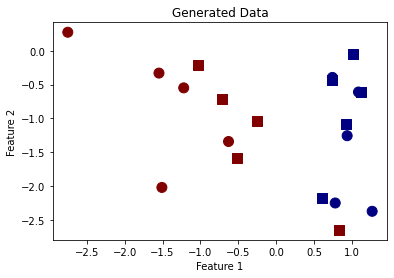

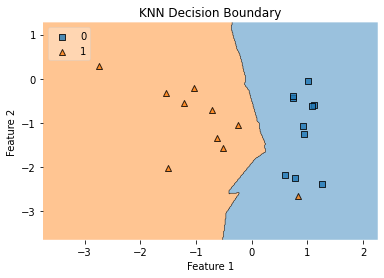

Accuracy: 90.00%


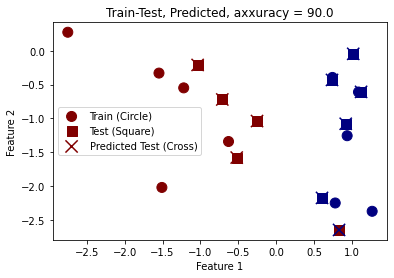

In [95]:
class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2)**2))

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        distances = [self.euclidean_distance(x, x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        most_common = max(set(k_nearest_labels), key=k_nearest_labels.count)
        return most_common

def plot_data(X, y):
    plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, s=100, cmap='jet', marker='o')
    plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, s=100, cmap='jet', marker='s')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Generated Data')
    plt.show()

if __name__ == "__main__":
    # Generate synthetic data using scikit-learn's make_classification function
    X, y = make_classification(n_samples=20, n_features=2, n_informative=2, n_redundant=0,
                               n_clusters_per_class=1, class_sep=1., random_state=23)
    plot_data(X, y)

    knn = KNN(k=3)
    knn.fit(X, y)

    plot_decision_regions(X, y, clf=knn, legend=2)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('KNN Decision Boundary')
    plt.show()

    # Split data into training and testing sets
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=19)

    # Predict classes for the test data
    y_pred = knn.predict(x_test)

    # Calculate accuracy
    accuracy = np.mean(y_pred == y_test) * 100
    print(f"Accuracy: {accuracy:.2f}%")

    # Plot the training and test data (o==circle, for train) and (s==square for test)
    plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, s=100, cmap='jet', marker='o', label='Train (Circle)')
    plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, s=100, cmap='jet', marker='s', label='Test (Square)')
    plt.scatter(x_test[:, 0], x_test[:, 1], c=y_pred, s=150, cmap='jet', marker='x', label='Predicted Test (Cross)')
    
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'Train-Test, Predicted, accuracy = {accuracy}')
    plt.legend()
    plt.show()


## **Discussion (Time & Memory)**

Testing with 1000 data points...
Testing with 5000 data points...
Testing with 10000 data points...
Testing with 50000 data points...
Testing with 100000 data points...


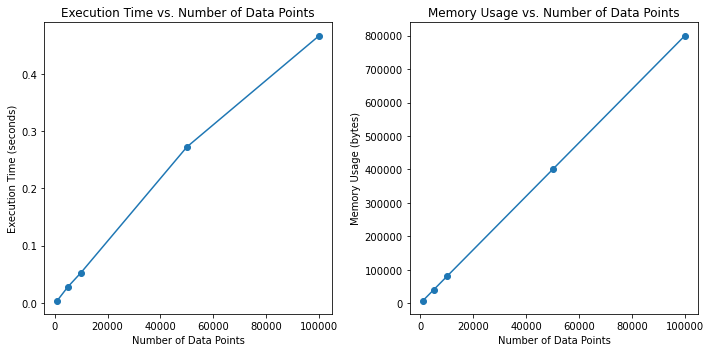

In [25]:
import time
import sys

# Define a range of sample sizes to test
sample_sizes = [1000, 5000, 10000, 50000, 100000]

# Lists to store time and memory usage for each sample size
execution_times = []
memory_usages = []

# Loop through each sample size
for sample_size in sample_sizes:
    print(f"Testing with {sample_size} data points...")
    
    # Generate synthetic data
    X, y = make_classification(n_samples=sample_size, n_features=2, n_informative=2, n_redundant=0,
                               n_clusters_per_class=1, class_sep=1., random_state=42)
    
    # Split data into training and testing sets
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
    
    # Calculate memory usage for training data
    train_memory_usage = x_train.size * x_train.itemsize
    memory_usages.append(train_memory_usage)
    
    # Instantiate and fit the KNN model
    model = KNN(3)
    model.fit(x_train, y_train)
    
    # Measure prediction time for a single test data point
    start_time = time.time()
    model.predict(x_test[[0], :])
    end_time = time.time()
    execution_time = end_time - start_time
    execution_times.append(execution_time)

# Plotting the results
plt.figure(figsize=(10, 5))

# Plot execution time
plt.subplot(1, 2, 1)
plt.plot(sample_sizes, execution_times, marker='o')
plt.xlabel('Number of Data Points')
plt.ylabel('Execution Time (seconds)')
plt.title('Execution Time vs. Number of Data Points')

# Plot memory usage
plt.subplot(1, 2, 2)
plt.plot(sample_sizes, memory_usages, marker='o')
plt.xlabel('Number of Data Points')
plt.ylabel('Memory Usage (bytes)')
plt.title('Memory Usage vs. Number of Data Points')

plt.tight_layout()
plt.show()


## Regression

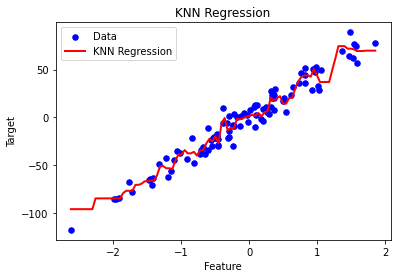

In [78]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

class KNNRegression:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2)**2))

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        distances = [self.euclidean_distance(x, x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        return np.mean(k_nearest_labels)

if __name__ == "__main__":
    # Generate synthetic regression data
    X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

    # Instantiate and fit the KNN regression model
    knn = KNNRegression(k=3)
    knn.fit(X, y)

    # Generate a range of feature values for plotting the regression line
    x_range = np.linspace(min(X), max(X), num=100).reshape(-1, 1)
    # Predict target values for the feature range
    y_pred = knn.predict(x_range)

    # Plot the data points and the regression line
    plt.scatter(X, y, color='blue', s=30, marker='o', label='Data')
    plt.plot(x_range, y_pred, color='red', linewidth=2, label='KNN Regression')
    plt.xlabel('Feature')
    plt.ylabel('Target')
    plt.title('KNN Regression')
    plt.legend()
    plt.show()


## Different values of k in knn

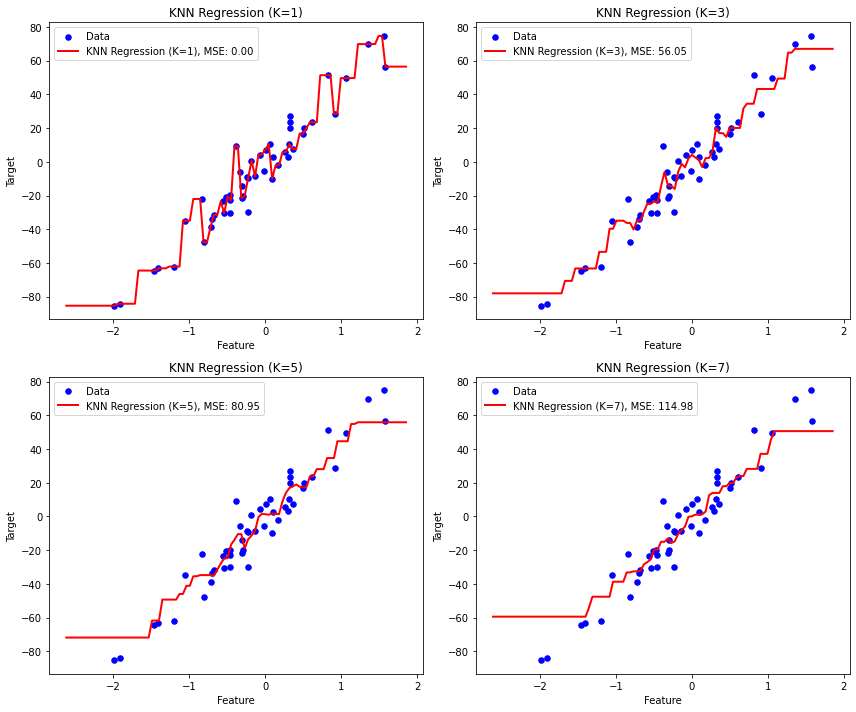

In [88]:
from sklearn.metrics import mean_squared_error

def test_k_values(X_train, y_train, X_range, k_values):
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))
    axs = axs.flatten()
    for i, k in enumerate(k_values):
        knn_reg = KNNRegression(k=k)

        # Fit the KNN regression model to the training data
        knn_reg.fit(X_train, y_train)

        # Predict target values for the range of feature values
        y_pred = knn_reg.predict(X_range)
        mse = mean_squared_error(y_train, knn_reg.predict(X_train))
        axs[i].scatter(X_train, y_train, color='blue', s=30, marker='o', label='Data')
        axs[i].plot(X_range, y_pred, color='red', linewidth=2, label=f'KNN Regression (K={k}), MSE: {mse:.2f}')
        axs[i].set_xlabel('Feature')
        axs[i].set_ylabel('Target')
        axs[i].set_title(f'KNN Regression (K={k})')
        axs[i].legend()
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    # Generate synthetic regression data
    X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
    
    # Generate a range of feature values for plotting the regression line
    X_range = np.linspace(min(X), max(X), num=100).reshape(-1, 1)
    
    # Test different values of K and plot the results
    k_values = [1, 3, 5, 7]
    test_k_values(X_train, y_train, X_range, k_values)

| Pros                               | Cons                                       |
|------------------------------------|--------------------------------------------|
| Simple to understand and implement | Computationally expensive for large datasets |
| No training phase                 | Sensitive to irrelevant features             |
| Versatile - works well with various data types | Requires careful selection of distance metric |
| Non-parametric - can capture complex relationships | High memory usage for storing the entire dataset |
| No assumptions about data distribution | Poor performance with high-dimensional data |